#LSTM

**Objetivo**: Criação de um modelo utilizando arquitetura LSTM

Para a criação de um modelo com arquitetura LSTM (Long short term memory) iremos utilizar o pacote tensorflow.

1. Carregamento dos dados

Batch: conjunto de observações que será passada por vez na rede neural, diferente dos modelos usuais de machine learning para redes neurais passamos um pequeno conjunto de dados a cada iteração.

In [11]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [12]:
dataset = tfds.load('imdb_reviews', as_supervised=True)

train_dataset, test_dataset = dataset['train'], dataset['test']

batch_size = 128
train_dataset = train_dataset.shuffle(15)
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

2. Camada encoder
A primeira camada da nossa rede neural será a camada de enconder, essa camada irá converter as palavras para indexes. Para isso usaremos a função TextVectorization.

```python
import tensorflow as tf
encoder = tf.keras.layers.TextVectorization()
encoder.adapt(train_dataset.map(lambda text, _: text))
```

Com essa função iremos criar um vetor codificado das palavras do texto. O parâmetro max_tokens controla o tamanho do vocabulário na vetorização. A função adapt irá adequar o vocabulário do texto.

Exercício:
1. Crie a camada encoder
2. Veja como fica um exemplo de texto na camada encoder (use encoder(texto).numpy())

In [13]:
encoder = tf.keras.layers.TextVectorization(max_tokens=10000)
encoder.adapt(train_dataset.map(lambda text, _: text))
vocabulary = np.array(encoder.get_vocabulary())

In [14]:
example, label = next(iter(train_dataset))

In [15]:
original_text = example.numpy()[0]
encoded_text = encoder(original_text).numpy()
decoded_text = ' '.join(vocabulary[encoded_text])

3. Criação do modelo
Iremos criar uma arquitetura sequencial que seguirá a seguinte ordem:
1. Encoder
2. Camada de embedding
3. Camada bidirecional
4. Camada Densa com ativação relu
5. Camada Densa com ativação linear


Para a construção do modelo iremos usar
```python
model = tf.keras.Sequential
model.add(camada)
```

Onde em camada iremos substituir pelas camadas desejadas, por exemplo na camada de encoder usamos
```python
model.add(encoder)
```

Para a criação da camada de embedding usaremos a função tf.keras.layers.Embedding, esta função possui dois parâmetros importantes
1. Input dimension - dimensão da entrada dos dados
2. Output dimension - dimensão da saída dos dados
Outro parâmetro importante é mask_zero que deve ser configurado como True caso as frases sejam de tamanho diferente.

Exemplo de uso:
```python
tf.keras.layers.Embedding(10000, 32, mask_zero=True)
```

Neste exemplo o input é de dimensão 10000 e o output de dimensão 32;

Para a criação da camada BiLSTM usaremos a função tf.keras.layers.Bidirectional e a função tf.keras.layers.LSTM. Iremos configurar apenas a camada LSTM, nela temos que colocar o tamanho do output e um dos seus parâmetros é return_sequences que deve ser configurado como True caso desejamos o output de toda a frase e não apenas o último (default é falso).

```python
tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32,  return_sequences=True))
```
Ira criar a camada LSTM com saída 32 e irá retorna toda a sequencia.

Por último a camada densa que é a camada mais simples, nela iremos passar o tamanho do output e a função de ativação; exemplos de função de ativação:

* linear
* softmax (sigmoid)
* relu (max(0,x))

```python
tf.keras.layers.Dense(64, activation='relu')
```

Exercício construa o modelo com a seguinte arquitetura:
1. Encoder
2. Camada de embedding com output 64 e mask_zero=True
3. Camada BiLSTM, com output 64
4. Camada Densa com output 64 e ativação relu
5. Camada Densa com output 1

In [16]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

4. Treino

Para resumir a arquitetura usamos a função summary
```python
model.summary()
```

Após montar a arquitetura precisamos definir a função de perda, o otimizador e uma métrica de acompanhamento. Para isso usamos a função compile no nosso exemplo usaremos a função de perda de Crossentropy Binaria e o otimizador Adam como no exemplo.

```python
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
```
 E para ajustar o modelo iremos usar .fit passando o dado de treino, o número de epochs (quantas vezes iremos passar o dado para a rede) e o banco de validação.

```python
model.fit(
    train_dataset,  
    epochs=5,
    validation_data=test_dataset,
)
```

Exercício:
1. Sumarize o modelo
2. Compile o modelo como no exemplo
3. Ajuste o modelo. Obs.: ao ajustar o modelo atribua o ajuste a um objeto.

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, None)              0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 714369 (2.73 MB)
Trainable params: 71436

In [18]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_dataset,
    epochs=3,
    validation_data=test_dataset,
)

Epoch 1/3
196/196 [==============================] - 1055s 5s/step - loss: 0.4214 - accuracy: 0.7804 - val_loss: 0.2887 - val_accuracy: 0.8792
Epoch 2/3
196/196 [==============================] - 977s 5s/step - loss: 0.2179 - accuracy: 0.9126 - val_loss: 0.3172 - val_accuracy: 0.8680
Epoch 3/3
196/196 [==============================] - 1020s 5s/step - loss: 0.1559 - accuracy: 0.9416 - val_loss: 0.3674 - val_accuracy: 0.8657


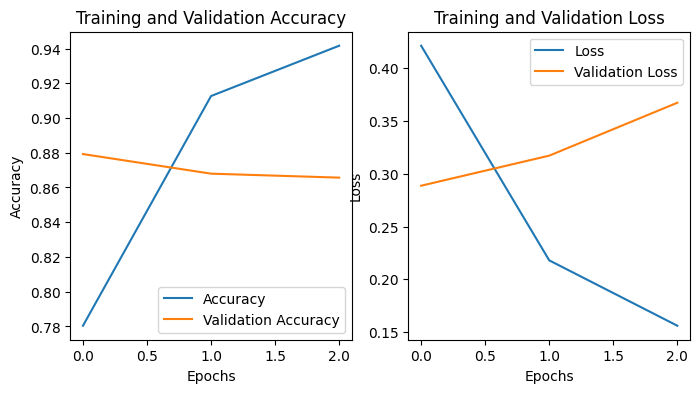

In [20]:
history_dict = history.history

# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

In [21]:
sample_text = (
    '''The movie by company was so good and the animation are so dope.
    I would recommend my friends to watch it.'''
)
predictions = model.predict(np.array([sample_text]))
print(*predictions[0])

# Print the label based on the prediction
if predictions[0] > 0:
    print('The review is positive')
else:
    print('The review is negative')

1/1 [==============================] - 3s 3s/step
2.548361
The review is positive
